# Chapter 5 - Basic Math and Statistics
## Segment 7 - Transforming dataset distributions

In [4]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

Scale generally means to change the range of the values. The shape of the distribution doesn’t change. Think about how a scale model of a building has the same proportions as the original, just smaller. That’s why we say it is drawn to scale. The range is often set at 0 to 1.

Standardize generally means changing the values so that the distribution standard deviation from the mean equals one. It outputs something very close to a normal distribution. Scaling is often implied.

Normalize can be used to mean either of the above things (and more!). I suggest you avoid the term normalize, because it has many definitions and is prone to creating confusion.

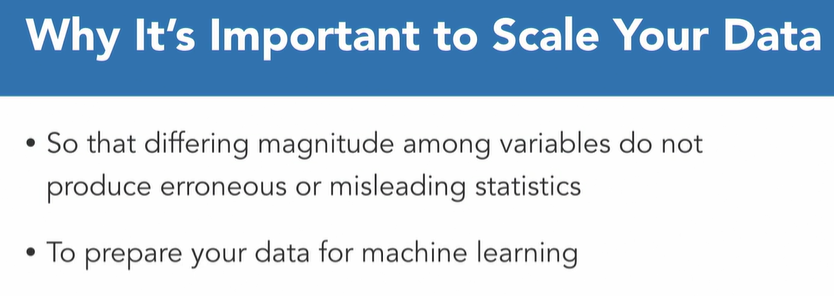

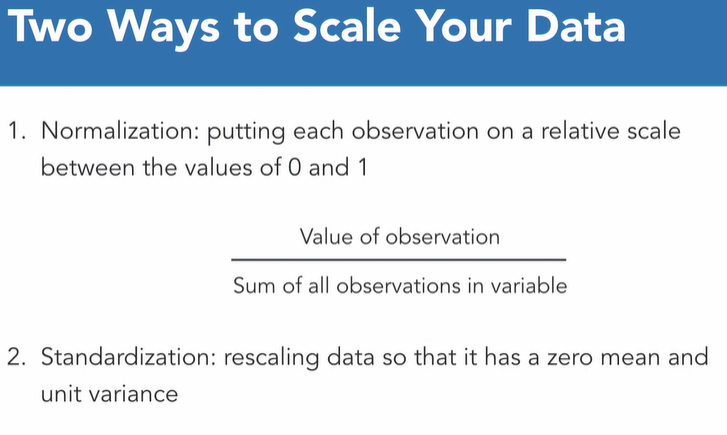

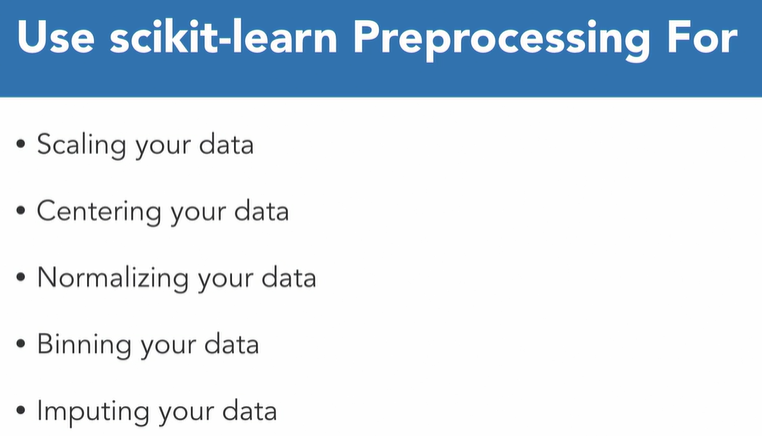

### Normalizing and transforming features with MinMaxScalar() and fit_transform()

In [6]:
address = r"C:\Users\Andre\Desktop\Projects\ecourses\PythonDataScienceEssentials\mtcars.csv"
cars = pd.read_csv(address)
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


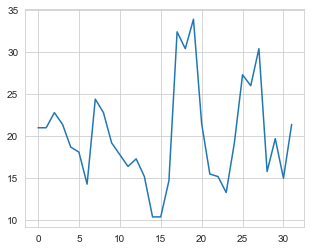

In [7]:
mpg = cars.mpg
plt.plot(mpg)

In [9]:
cars[['mpg']].describe()

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


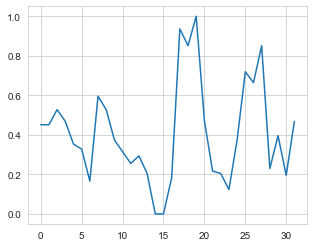

In [12]:
## reshape as a 1 column matrix
mpg_matrix = mpg.values.reshape(-1,1)
### min max transform by scaling to a define range

scaled = preprocessing.MinMaxScaler()

scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

Distribution is the same but now the values range between 0 and 1

MinMaxScaler is a good place to start unless you know you want your feature to have a normal distribution or want outliers to have reduced influence.

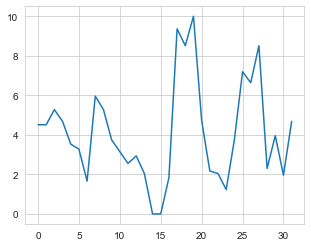

In [13]:
scaled = preprocessing.MinMaxScaler(feature_range=(0,10))

scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

### Using scale() to scale your features

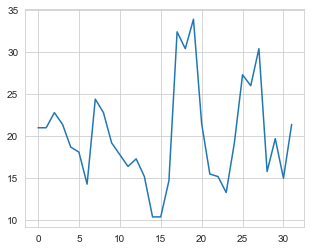

In [15]:
standardized_mpg = scale(mpg, axis=0, with_mean=False, with_std=False)
plt.plot(standardized_mpg)

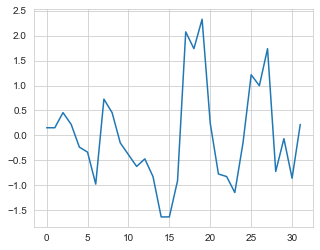

In [16]:
standardized_mpg = scale(mpg)
plt.plot(standardized_mpg)

http://damienfrancois.be/blog/pivot/entry.php?id=8